**4.2 Pseudorandom Number Generation**

* The numpy.random module supplements the built-in Python random module with
functions for efficiently generating whole arrays of sample values from many kinds of
probability distributions.

In [1]:
import numpy as np

In [4]:
samples = np.random.normal(size=(3,2))

In [5]:
samples

array([[-0.70297434, -0.22796914],
       [-0.15623975,  0.52889472],
       [-0.26516405,  0.2119445 ]])

**Python’s built-in random module, by contrast, samples only one value at a time. As
you can see from this benchmark, numpy.random is well over an order of magnitude
faster for generating very large samples:**

In [6]:
from random import normalvariate

In [7]:
N = 1_000_000

In [13]:
%timeit samples  = [normalvariate(0,1) for i in range(N)]

661 ms ± 9.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit np.random.standard_normal(size = N)

29.6 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**4.3 Universal Functions: Fast Element-Wise Array
Functions**

* A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.

In [16]:
arr = np.arange(10)

In [18]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [20]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [22]:
x = np.random.standard_normal(8)
y = np.random.standard_normal(8)

In [23]:
x == y

array([False, False, False, False, False, False, False, False])

In [24]:
x + y

array([ 0.01234856, -0.33846905, -0.73024765,  1.85507171, -2.50450957,
       -1.08255183,  0.15448908,  0.2347283 ])

In [25]:
np.maximum(x,y)

array([ 0.68800635,  0.79056913, -0.14598894,  1.20812886, -0.87319566,
       -0.53661811,  0.3870711 ,  1.26887919])

In [26]:
arr = np.random.standard_normal(10) * 3

In [27]:
arr

array([ 4.93934268, -4.37073744, -1.0981039 ,  0.04147544, -0.55803841,
        2.3311176 , -1.90463692, -2.18223557, -4.76971052,  6.21977587])

In [28]:
remainder, whole_part = np.modf(arr)

In [29]:
remainder

array([ 0.93934268, -0.37073744, -0.0981039 ,  0.04147544, -0.55803841,
        0.3311176 , -0.90463692, -0.18223557, -0.76971052,  0.21977587])

In [30]:
whole_part

array([ 4., -4., -1.,  0., -0.,  2., -1., -2., -4.,  6.])

**4.4 Array-Oriented Programming with Arrays**

* As a simple example, suppose we wished to evaluate the function sqrt(x^2 +
y^2) across a regular grid of values. The numpy.meshgrid function takes two onedimensional arrays and produces two two-dimensional matrices corresponding to all
pairs of (x, y) in the two arrays:

In [35]:
points =  np.arange(-5,5,0.01)

In [38]:
x, y = np.meshgrid(points, points)

In [39]:
z = np.sqrt(x**2 + y**2)

In [40]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

**Expressing Conditional Logic as Array Operations**

In [44]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [45]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [46]:
cond = np.array([True, False, True, True, False])


**Suppose we wanted to take a value from xarr whenever the corresponding value in
cond is True, and otherwise take the value from yarr. A list comprehension doing
this might look like.**

In [47]:
result = [(x if c else y) for x, y, c in zip(xarr,yarr,cond)]

In [48]:
result

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

**Suppose we wanted to take a value from xarr whenever the corresponding value in
cond is True, and otherwise take the value from yarr. A list comprehension doing
this might look like.**

In [49]:
result = np.where(xarr, yarr, cond)

In [50]:
result

array([2.1, 2.2, 2.3, 2.4, 2.5])

**The second and third arguments to numpy.where don’t need to be arrays; one or
both of them can be scalars. A typical use of where in data analysis is to produce a
new array of values based on another array. Suppose you had a matrix of randomly
generated data and you wanted to replace all positive values with 2 and all negative
values with –2. This is possible to do with numpy.where:**

In [51]:
arr = np.random.normal(size = (3,3))

In [52]:
arr

array([[ 0.72981891,  0.21705042, -0.88657845],
       [-0.945503  ,  1.85815946,  0.38385092],
       [ 1.0632158 , -1.2735968 ,  0.24596612]])

In [53]:
arr > 0

array([[ True,  True, False],
       [False,  True,  True],
       [ True, False,  True]])

In [54]:
result = np.where(arr>0 , 2, -2)

In [55]:
result

array([[ 2,  2, -2],
       [-2,  2,  2],
       [ 2, -2,  2]])

In [56]:
result = np.where(arr > 0, 2, arr)

In [57]:
result

array([[ 2.        ,  2.        , -0.88657845],
       [-0.945503  ,  2.        ,  2.        ],
       [ 2.        , -1.2735968 ,  2.        ]])

**Mathematical and Statistical Methods**

In [60]:
arr = np.random.normal(size = (3,3))

In [61]:
arr

array([[-0.59179909, -1.31733777,  0.52419712],
       [ 0.72508314,  0.53151059, -1.31953921],
       [-0.44992572, -0.29830393,  1.58926698]])

In [62]:
arr.mean()

np.float64(-0.0674275430065088)

In [63]:
np.mean(arr)

np.float64(-0.0674275430065088)

In [64]:
arr.sum()

np.float64(-0.6068478870585792)

**arr.mean(axis=1) means “compute mean across the columns,” where
arr.sum(axis=0) means “compute sum down the rows.**

In [65]:
arr.mean(axis = 0)

array([-0.10554722, -0.36137704,  0.26464163])

In [66]:
arr.mean(axis = 1)

array([-0.46164658, -0.02098183,  0.28034578])

**Other methods like cumsum and cumprod do not aggregate, instead producing an array
of the intermediate results:**

In [67]:
arr = np.array([0,1,2,3,4,5,6,7,8,9,10])

In [68]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [69]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

**In multidimensional arrays, accumulation functions like cumsum return an array of
the same size but with the partial aggregates computed along the indicated axis
according to each lower dimensional slice:**

* The expression arr.cumsum(axis=0) computes the cumulative sum along the rows,
while arr.cumsum(axis=1) computes the sums along the columns

In [70]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [71]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [75]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [76]:
arr.cumsum(axis = 1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In [79]:
arr.max(axis = 0)

array([6, 7, 8])

In [82]:
arr = np.random.normal(size = (2,2))

In [83]:
arr

array([[-0.35606098,  0.22755743],
       [-1.78598823,  2.15643951]])

In [84]:
arr > 0

array([[False,  True],
       [False,  True]])

In [86]:
# Number of positive values
(arr > 0).sum()

np.int64(2)

In [87]:
# Number of negative values
(arr < 0).sum()

np.int64(2)

**Sorting**

In [88]:
arr = np.random.normal(size = (2,4))

In [89]:
arr

array([[ 0.88928412, -0.03591205, -0.39316022,  1.35452709],
       [-0.2744059 ,  1.32717251, -0.47144573,  0.26523685]])

In [92]:
arr.sort(axis = 0)
arr

array([[-0.2744059 , -0.03591205, -0.47144573,  0.26523685],
       [ 0.88928412,  1.32717251, -0.39316022,  1.35452709]])

In [94]:
arr.sort(axis = 1)
arr

array([[-0.47144573, -0.2744059 , -0.03591205,  0.26523685],
       [-0.39316022,  0.88928412,  1.32717251,  1.35452709]])

**Unique and Other Set Logic**
* NumPy has some basic set operations for one-dimensional ndarrays. A commonly
used one is numpy.unique, which returns the sorted unique values in an array:


In [95]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

In [97]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [98]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [99]:
np.unique(ints)

array([1, 2, 3, 4])

**Another function, numpy.in1d, tests membership of the values in one array in
another, returning a Boolean array:**

In [100]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [101]:
np.in1d(values,[2,3,6])

<ipython-input-101-d45d6c47b1e3>:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(values,[2,3,6])


array([ True, False, False,  True,  True, False,  True])

**Linear Algebra**

In [103]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [104]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [105]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [106]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [107]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [108]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [109]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

In [111]:
x @ np.ones(3)

array([ 6., 15.])

**numpy.linalg has a standard set of matrix decompositions and things like inverse
and determinant:**

In [114]:
from numpy.linalg import inv, qr

In [115]:
x = np.random.normal(size =  (3,3))

In [116]:
x

array([[ 1.5101701 , -2.08053549,  0.00737363],
       [ 2.01499995, -0.34950199, -0.63435276],
       [ 1.08788977, -0.7441714 , -1.03753045]])

In [117]:
inv(x)

array([[ 0.03545036,  0.70095552, -0.42831675],
       [-0.45362875,  0.51010124, -0.31510306],
       [ 0.36253743,  0.36910685, -1.18692491]])

In [118]:
qr(x)

QRResult(Q=array([[-0.55054343,  0.78644947, -0.27999852],
       [-0.7345828 , -0.61572876, -0.28507228],
       [-0.39659808,  0.04873743,  0.91669767]]), R=array([[-2.74305353,  1.69730025,  0.87340771],
       [ 0.        , -1.4573066 ,  0.34582165],
       [ 0.        ,  0.        , -0.77232996]]))

**Example: Random Walks**

In [123]:
import random
import matplotlib.pyplot as plt

In [124]:
position = 0
walk = [position]
nsteps = 1000
for i in range(nsteps):
  step = 1 if random.randint(0,1) else -1
  position += step
  walk.append(position)

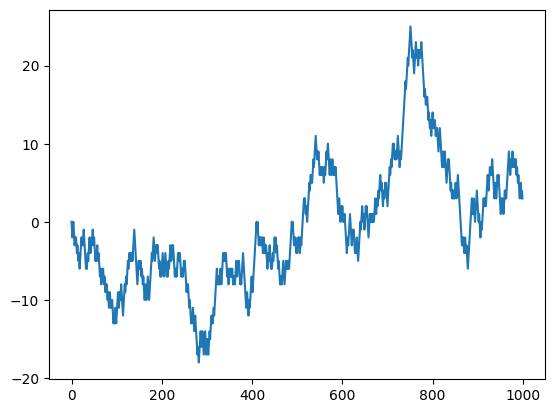

In [125]:
plt.plot(walk[:1000])

In [133]:
random.randint(0,1)

1

In [145]:
nsteps = 1000
rng = np.random.default_rng(seed=12345) # fresh random generator

In [152]:
draws = rng.integers(0, 2, size=nsteps) * 2 -1

In [154]:
# steps = np.where(draws == 0,1,-1)

In [155]:
#steps

In [150]:
walk = steps.cumsum()

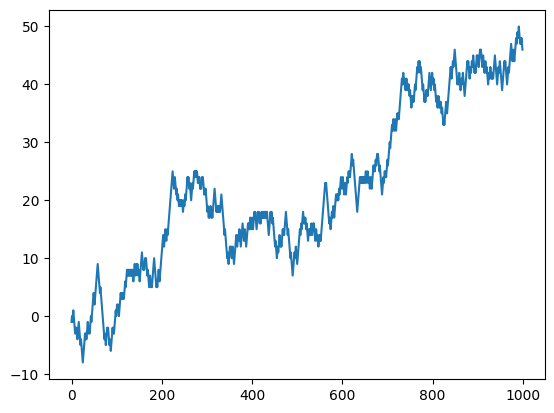

In [151]:
plt.plot(walk)

**Simulating Many Random Walks at Once**

In [167]:
nwalks = 5
nsteps = 10

In [166]:
rng = np.random.default_rng(seed=12345) # fresh random generator
steps = rng.integers(0, 2, size=(nwalks, nsteps)) * 2 -1
steps

array([[ 1, -1,  1, -1, -1,  1,  1,  1,  1, -1],
       [ 1, -1,  1,  1, -1, -1, -1,  1,  1,  1],
       [ 1, -1,  1,  1,  1,  1, -1, -1, -1, -1],
       [-1,  1, -1,  1, -1, -1, -1,  1,  1, -1],
       [ 1, -1, -1, -1,  1, -1, -1, -1, -1, -1]])

In [168]:
walks = steps.cumsum(axis = 1)

In [169]:
walks

array([[ 1,  0,  1,  0, -1,  0,  1,  2,  3,  2],
       [ 1,  0,  1,  2,  1,  0, -1,  0,  1,  2],
       [ 1,  0,  1,  2,  3,  4,  3,  2,  1,  0],
       [-1,  0, -1,  0, -1, -2, -3, -2, -1, -2],
       [ 1,  0, -1, -2, -1, -2, -3, -4, -5, -6]])

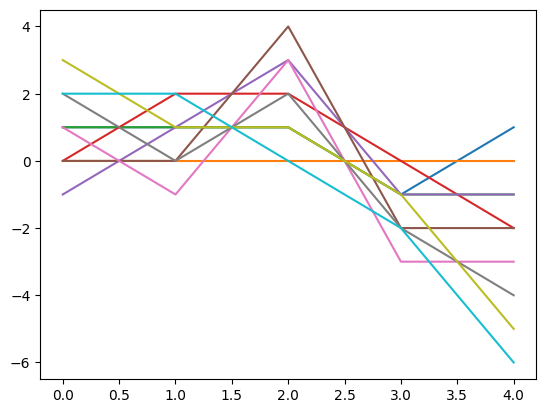

In [170]:
plt.plot(walks)